# Image Recognition
In this notebook, you will create a convolutional neural network to classify images in CIFAR dataset.

In [43]:
# Import TensorFlow and Keras to create the neural network
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np

# Matplotlib to plot info to show the results
import matplotlib.pyplot as plt
%matplotlib inline


# Preparing the CIFAR data

You'll write the code to load the CIFAR data from the files, and add the code that processes it into a format your neural network can use.

## Load the Data

In [44]:
# Load the CIFAR Data
def show_min_max(array, i):
    random_image = array[i]
    print("min and max value in image: ", random_image.min(), random_image.max())

In [45]:
# Create a function that will plot a image from the dataset and display the image.
def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(str(label_names[labels[i]]))
    plt.xticks([])
    plt.yticks([])
    plt.show([])

In [46]:
# Create variables for the image row and column to keep track of your image size.
img_rows, img_cols = 32, 32

# Create a variable called num_classes and set the value to 10 output classes.
num_classes = 10

In [47]:
# Create an input_shape variable to keep track of what shape this data is.
input_shape = (img_rows, img_cols, 3)

In [48]:
# Load the data into your program to train the model and data to test it.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Load a backup copy of the untouched data, while the first copy will be processing the data and manipulating it.
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

In [49]:
# Add a list of labels.
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a backup copy for the training labels.
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]

# Create a backup copy for the test labels.
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

In [50]:
# Print the shape of the training image dataset.
print(train_images.shape)

# Print the shape of the test image dataset.
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


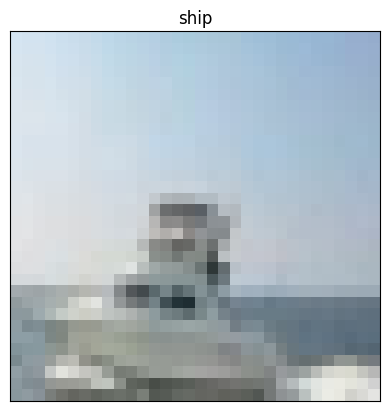

min and max value in image:  30 242


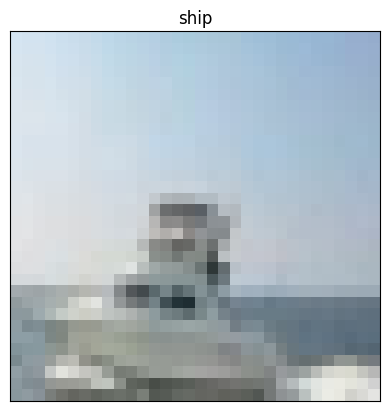

In [51]:
# Call the plot_image function to print out the 100th image in train_images with the backup labels.
plot_image(train_images, 100, train_labels_backup)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

# Sorting through the Data
Now that the data is loaded, you'll do simple data cleaning. The color in pixels is stored as an integer value between 0 and 255. While your network can learn from this information, it will be easier to replace these values with a decimal between 0 and 1. This keeps the numbers the network is dealing with small.

## Data Cleaning

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


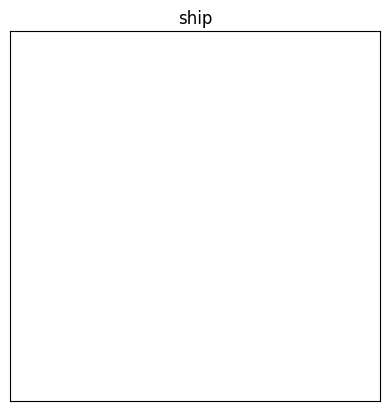

min and max value in image:  30.0 242.0


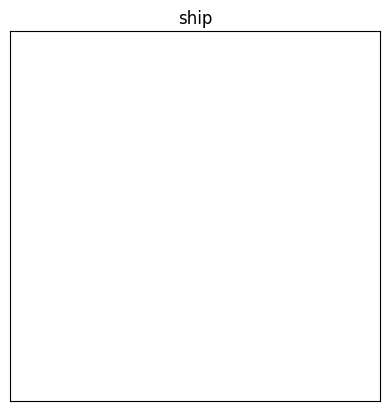

In [52]:
# Change the image values to between 0 and 1, convert the training data into float32.
train_images = train_images.astype('float32')

# Change the image values to between 0 and 1, convert the test data into float32.
test_images = test_images.astype('float32')

# Call the plot_image function to print out the 100th image in train_images with the backup labels.
plot_image(train_images, 100, train_labels_backup)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

# Divide the images by 255 to make sure that each pixel is stored as a value between 0 and 1.
train_images /= 255
test_images /= 255

# Load the train labels.
train_labels = keras.utils.to_categorical(train_labels, num_classes)

# Load the test labels.
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Building the Network
Neural networks learn to accomplish their tasks by reading training data and adjusting their neuron weights to improve their chance of choosing the correct answer.

## Import Model and Layers

In [53]:
# Import the Sequential model.
from tensorflow.keras.models import Sequential

# Import the Dense, Dropout, Flatten, Conv2D, MaxPooling2D, and BatchNormalization layers.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

## Epochs and Model Layers

In [54]:
# Create a variable called epochs and set the value as 10.
epochs = 10

# Create a variable to store the batch size and set the value as 64.
batch_size=64

# Create a new model object using the Keras Sequential command.
model=Sequential()

# Add a convolutional layer.
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu', input_shape=input_shape))

# Add another convolutional layer.
model.add(Conv2D(filters=64, kernel_size=(3,3),activation = 'relu'))

# Add a max pooling layer to condense the information the network has learned so far.
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout layer, so the network doesn't learn to rely on specific neurons.
model.add(Dropout(rate=0.2))

## Batch Normalization

In [55]:
# Add a BatchNormalization layer to your model
model.add(BatchNormalization())

# Adding More Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

# The Final Stage of Layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

# The Output Layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)       

# Training the Model
First, you will compile the model and decide on a loss function, optimizer, and metrics. Then, you will use the fit function to train the model using the data. Finally, evaluate the model using the evaluate function.

## Compile the Network

In [56]:
# Add the compile function that calculates the loss and uses the optimizer parameter to set the optimization algorithm..
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

## Training

In [57]:
# Add the fit function and set the input data for the model so the network doesn't rely on a pattern to learn.
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)

Epoch 1/10
782/782 [==============================] - 161s 200ms/step - loss: 1.5714 - accuracy: 0.4459 - val_loss: 1.5905 - val_accuracy: 0.4370
Epoch 2/10
782/782 [==============================] - 192s 245ms/step - loss: 1.1036 - accuracy: 0.6067 - val_loss: 1.0226 - val_accuracy: 0.6391
Epoch 3/10
782/782 [==============================] - 189s 242ms/step - loss: 0.9129 - accuracy: 0.6775 - val_loss: 1.0936 - val_accuracy: 0.6403
Epoch 4/10
782/782 [==============================] - 122s 156ms/step - loss: 0.7945 - accuracy: 0.7203 - val_loss: 0.9083 - val_accuracy: 0.6814
Epoch 5/10
782/782 [==============================] - 122s 156ms/step - loss: 0.7191 - accuracy: 0.7462 - val_loss: 0.7850 - val_accuracy: 0.7254
Epoch 6/10
782/782 [==============================] - 125s 160ms/step - loss: 0.6618 - accuracy: 0.7663 - val_loss: 0.7922 - val_accuracy: 0.7266
Epoch 7/10
782/782 [==============================] - 71s 91ms/step - loss: 0.6100 - accuracy: 0.7830 - val_loss: 0.7323 - v

## Analyzing the Output

In [58]:
# Save the scores and calculate the loss and accuracy of your model.
scores = model.evaluate(test_images, test_labels,verbose=0)

# Print out the test accuracy.
print('Test accuracy:', scores[1])

Test accuracy: 0.7645999789237976


## Exporting the Model

In [60]:
# Export your model
model.save('cifar_model.h5')


C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
